In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 多项式回归

如果你的数据实际上比简单的直线更复杂呢？ __[多项式回归和模型泛化](https://www.jianshu.com/p/8e5da35d6382 )__  <<< 这里有个绘图链接

令人惊讶的是，你依然可以使用 __线性模型__ 来拟合 __非线性数据__ 。	

一个简单的方法是 __对每个特征进行加权后作为新的特征__ ，然后 __训练一个线性模型__ 在这个扩展的特征集。

这种方法称为 __多项式回归__。

In [259]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
noise = np.random.normal(0, 1, size=100)
noise = noise.reshape(-1, 1)
y = 0.5 * X**2 + X + 2 + noise

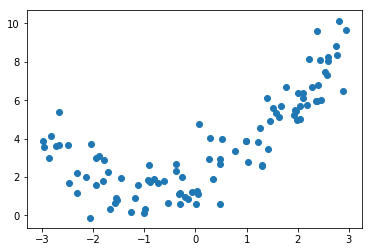

In [260]:
plt.scatter(x,y)

In [261]:
from sklearn.linear_model import LinearRegression

In [264]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [265]:
lin_reg.intercept_ # 输出截距

array([3.53698747])

In [266]:
lin_reg.coef_      # 输出θ 

array([[1.02374843]])

#### 直接使用直线拟合数据

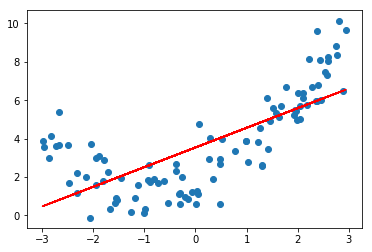

In [268]:
plt.scatter(X,y)
plt.plot(X,lin_reg.predict(X),"r-") 

很清楚的看出， __直线不能恰当的拟合这些数据__ 。

于是，我们使用	__Scikit-Learning__ 的 __PolynomialFeatures__ 类进行训练数据集的转换，让训练集中 __每个特征的平方__ （2 次多项式） 作为 __新特征__（在这种情况下，仅存在一个特征）

In [245]:
from sklearn.preprocessing import PolynomialFeatures

__使用sklearn中的PolynomialFeatures进行多项式回归__

In [279]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly_features.fit_transform(X)

__X_poly__ 现在 __包含原始特征__ 和 __这个特征的平方__ 。

In [284]:
print('X[0]: ',X[0])
print('x_poly[0]: ',x_poly[0])

X[0]:  [0.7637525]
x_poly[0]:  [0.7637525  0.58331788]


现在你可以在这个扩展训练集上使用 __LinearRegression__ 模型进行拟合。

In [271]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__根据线性回归得到预测值__

In [276]:
y_predect = lin_reg2.predict(x_poly)

#### 使用多项式拟合数据
    
__排序__ 是为了在绘制线的时候从最左端开始绘制

__y_predect[np.argsort(x)]__ 依据 __np.sort(x)__ 的顺序

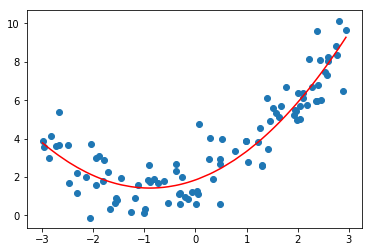

In [278]:
plt.scatter(x,y)
plt.plot(np.sort(x), y_predect[np.argsort(x)], color='r')

__多项式的截距__

In [272]:
lin_reg2.intercept_

array([1.8482332])

__多项式的斜率__

In [273]:
lin_reg2.coef_

array([[0.95244305, 0.53351694]])

__这样模型的预测函数就是等于:__   

y = 0.53 \* x^2 + 0.95 \* x + 1.84

### 温馨提示： 

<img src='1.jpg'>

### 问题：如何确定模型复杂度？如何判断模型过拟合还是欠拟合？

在这个训练集上，二次模型有着较好的泛化能力。那是因为在生成数据时使用了二次模型，但是一般我们不知道这个数据生成函数是什么。

__那我们该如何决定我们模型的复杂度呢__ ？ __你如何告诉我你的模型是过拟合还是欠拟合__ ？


### 解决方案：

__1、使用交叉验证：__ 我们可以通过 __交叉验证__ 来评估一个模型的 __泛化能力__ ，如果一个模型在训练集上表现的 __良好__ ，通过 __交叉验证指标__ 却得出其泛化能力很 __差__ ，那么模型 __过拟合__ 。如果两个方面都表现的不好，那么 __欠拟合__ 。这种方法可以告诉我们模型是太 __复杂__ 还是太 __简单__ 了。

__2、通过观察学习曲线：__ 画出模型在训练集上的表现，同时画出以训练集规模为自变量的训练集函数。为了得到图像，需要在训练集的不同规模子集上进行多次训练